# Machine Learning 301

## Classification and Refression Tree (CART) 

* Amaç veri seti içerisindeki karmaşık yapıları, basit karar yapılarına dönüştürmektir.
* Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
* Aşırı öprenmeye karşı dayanıklı değildir, büyük veri setlerinde dier algoitmalara göre daha az doğru tahminler yapar.

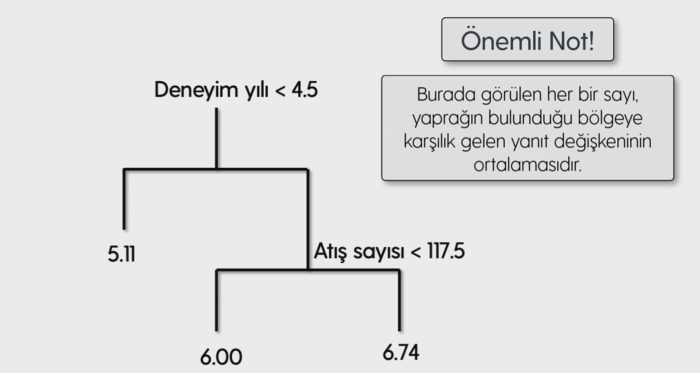

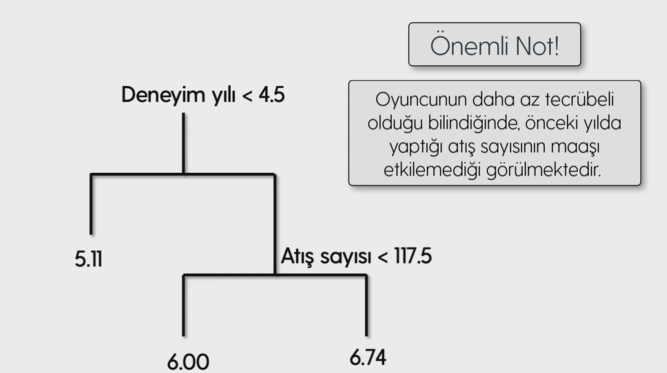

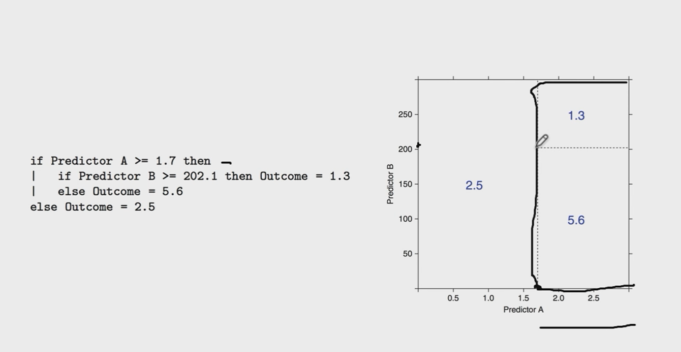

### Model ve Tahmin 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings("ignore") 

# önceki bölümlerde alınan uyarı mesajlarını ignore eder

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [5]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=3)
# max_leaf_nodes maximum yaprak sayısı

In [6]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

Text(0, 0.5, 'Maaş (Salary)')

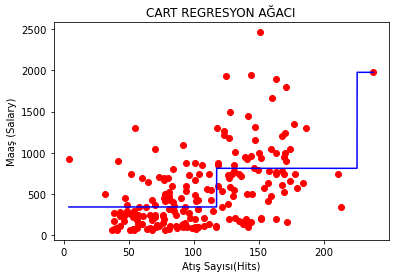

In [7]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = "red")

plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")

plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [8]:
#tek değişkenli tahmin

In [9]:
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [10]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

In [11]:
# tüm değişkenlerle tahmin

In [12]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [13]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [14]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

433.64924057700733

### Model Tuning 

In [15]:
?cart_model

In [16]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

391.5530522634766

In [ ]:
# splitter : best - random
# max_depth : ağacın derinliği
# min_samples_split : bir yaprağı dala çevirmek için gerekli olan gözlem sayısını ifade eder
# min_saple_leaf : en sonda kalan yaprağın yaprak olarak tanımlanması için gerekli olan gözlem sayısını ifade eden parametredir

In [17]:
cart_params = {"max_depth" : [2,3,4,5,10,20],
              "min_samples_split" : [2,10,5,30,50,100]}

In [18]:
cart_model = DecisionTreeRegressor()

In [19]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [20]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [21]:
# final modeli

In [22]:
cart_tuned_model = DecisionTreeRegressor(max_depth = 4,min_samples_split = 50).fit(X_train, y_train)

In [23]:
y_pred = cart_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434